# Disclaimer

I use nick code ipynb in https://github.com/nicknochnack/TFODCourse/blob/main/2.%20Training%20and%20Detection.ipynb and I don't claim this is my work 100%, I just use that i will use, then i try to make it simple like in export model section and add some adjustment in pipeline_config so i can change config with different pretrained model

In [34]:
import os

#Run this wget install once
#!pip install wget
import wget
import object_detection
import tensorflow as tf
from object_detection.utils import config_util
from object_detection.protos import pipeline_pb2
from google.protobuf import text_format

In [35]:
#Model choice
PRETRAINED_MODEL_NAME_URL_DICT = {
    # Add another pretrained tf model zoo here
    "centernet_resnet101_v1_fpn_512x512_coco17_tpu-8": "http://download.tensorflow.org/models/object_detection/tf2/20200711/centernet_resnet101_v1_fpn_512x512_coco17_tpu-8.tar.gz",
    "ssd_mobilenet_v2_fpnlite_320x320_coco17_tpu-8": "http://download.tensorflow.org/models/object_detection/tf2/20200711/ssd_mobilenet_v2_fpnlite_320x320_coco17_tpu-8.tar.gz",
    "ssd_mobilenet_v2_fpnlite_640x640_coco17_tpu-8": "http://download.tensorflow.org/models/object_detection/tf2/20200711/ssd_mobilenet_v2_fpnlite_640x640_coco17_tpu-8.tar.gz",
    "faster_rcnn_resnet101_v1_640x640_coco17_tpu-8": "http://download.tensorflow.org/models/object_detection/tf2/20200711/faster_rcnn_resnet101_v1_640x640_coco17_tpu-8.tar.gz",
}

# Insert name of our custom model
CUSTOM_MODEL_NAME = 'name_of_our_custom_model' 
# pretrained model that we selected from PRETRAINED_MODEL_NAME_URL_DICT, e.g. ssd_mobilenet_v2_fpnlite_320x320_coco17_tpu-8
PRETRAINED_MODEL_NAME = 'ssd_mobilenet_v2_fpnlite_320x320_coco17_tpu-8' 
PRETRAINED_MODEL_URL = PRETRAINED_MODEL_NAME_URL_DICT[PRETRAINED_MODEL_NAME]

# open-source code/library to generate tf record https://github.com/nicknochnack/GenerateTFRecord
TF_RECORD_SCRIPT_NAME = 'generate_tfrecord.py' 
LABEL_MAP_NAME = 'label_map.pbtxt'

In [36]:
paths = {
    'WORKSPACE_PATH': os.path.join('Tensorflow', 'workspace'),
    'SCRIPTS_PATH': os.path.join('Tensorflow','scripts'),
    'APIMODEL_PATH': os.path.join('Tensorflow','models'),
    'ANNOTATION_PATH': os.path.join('Tensorflow', 'workspace','annotations'),
    'IMAGE_PATH': os.path.join('Tensorflow', 'workspace','images'),
    'MODEL_PATH': os.path.join('Tensorflow', 'workspace','models'),
    'PRETRAINED_MODEL_PATH': os.path.join('Tensorflow', 'workspace','pre-trained-models'),
    'CHECKPOINT_PATH': os.path.join('Tensorflow', 'workspace','models',CUSTOM_MODEL_NAME), 
    'OUTPUT_PATH': os.path.join('Tensorflow', 'workspace','models',CUSTOM_MODEL_NAME, 'export'), 
    'TFJS_PATH':os.path.join('Tensorflow', 'workspace','models',CUSTOM_MODEL_NAME, 'tfjsexport'), 
    'TFLITE_PATH':os.path.join('Tensorflow', 'workspace','models',CUSTOM_MODEL_NAME, 'tfliteexport'), 
    'PROTOC_PATH':os.path.join('Tensorflow','protoc')
 }

In [37]:
files = {
    'PIPELINE_CONFIG':os.path.join('Tensorflow', 'workspace','models', CUSTOM_MODEL_NAME, 'pipeline.config'),
    'TF_RECORD_SCRIPT': os.path.join(paths['SCRIPTS_PATH'], TF_RECORD_SCRIPT_NAME), 
    'LABELMAP': os.path.join(paths['ANNOTATION_PATH'], LABEL_MAP_NAME)
}

In [38]:
def make_dirs_from_paths(paths):
    for path in paths.values():
        if not os.path.exists(path):
            if os.name == 'nt':
                !mkdir {path}

In [ ]:
#Run Once
make_dirs_from_paths(paths)

# Clone tf api object detection from tensorflow/models & install protobuf in windows

In [9]:
#Run Once
# if not os.path.exists(os.path.join(paths['APIMODEL_PATH'], 'research', 'object_detection')):
#     !git clone https://github.com/tensorflow/models {paths['APIMODEL_PATH']}

In [31]:
#Run Once
# url="https://github.com/protocolbuffers/protobuf/releases/download/v3.15.6/protoc-3.15.6-win64.zip"
# wget.download(url)
# !move protoc-3.15.6-win64.zip {paths['PROTOC_PATH']}
# !cd {paths['PROTOC_PATH']} && tar -xf protoc-3.15.6-win64.zip
# os.environ['PATH'] += os.pathsep + os.path.abspath(os.path.join(paths['PROTOC_PATH'], 'bin'))   
# !cd Tensorflow/models/research && protoc object_detection/protos/*.proto --python_out=. && copy object_detection\\packages\\tf2\\setup.py setup.py && python setup.py build && python setup.py install
# !cd Tensorflow/models/research/slim && pip install -e . 

100% [..........................................................................] 1468733 / 1468733        1 file(s) moved.
        1 file(s) copied.
running build
running build_py
copying object_detection\protos\anchor_generator_pb2.py -> build\lib\object_detection\protos
copying object_detection\protos\argmax_matcher_pb2.py -> build\lib\object_detection\protos
copying object_detection\protos\bipartite_matcher_pb2.py -> build\lib\object_detection\protos
copying object_detection\protos\box_coder_pb2.py -> build\lib\object_detection\protos
copying object_detection\protos\box_predictor_pb2.py -> build\lib\object_detection\protos
copying object_detection\protos\calibration_pb2.py -> build\lib\object_detection\protos
copying object_detection\protos\center_net_pb2.py -> build\lib\object_detection\protos
copying object_detection\protos\eval_pb2.py -> build\lib\object_detection\protos
copying object_detection\protos\faster_rcnn_box_coder_pb2.py -> build\lib\object_detection\protos
copying obj

C:\Users\Fadhlan\Anaconda3\envs\budayai-env\lib\site-packages\setuptools\command\install.py:34: SetuptoolsDeprecationWarning: setup.py install is deprecated. Use build and pip and other standards-based tools.
  warnings.warn(
C:\Users\Fadhlan\Anaconda3\envs\budayai-env\lib\site-packages\setuptools\command\easy_install.py:144: EasyInstallDeprecationWarning: easy_install command is deprecated. Use build and pip and other standards-based tools.
  warnings.warn(
zip_safe flag not set; analyzing archive contents...
object_detection.core.__pycache__.densepose_ops.cpython-38: module references __file__
object_detection.core.__pycache__.preprocessor.cpython-38: module MAY be using inspect.stack
object_detection.utils.__pycache__.autoaugment_utils.cpython-38: module MAY be using inspect.stack
C:\Users\Fadhlan\Anaconda3\envs\budayai-env\lib\site-packages\pkg_resources\__init__.py:122: PkgResourcesDeprecationWarning:  is an invalid version and will not be supported in a future release
  warnings.


byte-compiling build\bdist.win-amd64\egg\deployment\__init__.py to __init__.cpython-38.pyc
byte-compiling build\bdist.win-amd64\egg\nets\alexnet.py to alexnet.cpython-38.pyc
byte-compiling build\bdist.win-amd64\egg\nets\alexnet_test.py to alexnet_test.cpython-38.pyc
byte-compiling build\bdist.win-amd64\egg\nets\cifarnet.py to cifarnet.cpython-38.pyc
byte-compiling build\bdist.win-amd64\egg\nets\cyclegan.py to cyclegan.cpython-38.pyc
byte-compiling build\bdist.win-amd64\egg\nets\cyclegan_test.py to cyclegan_test.cpython-38.pyc
byte-compiling build\bdist.win-amd64\egg\nets\dcgan.py to dcgan.cpython-38.pyc
byte-compiling build\bdist.win-amd64\egg\nets\dcgan_test.py to dcgan_test.cpython-38.pyc
byte-compiling build\bdist.win-amd64\egg\nets\i3d.py to i3d.cpython-38.pyc
byte-compiling build\bdist.win-amd64\egg\nets\i3d_test.py to i3d_test.cpython-38.pyc
byte-compiling build\bdist.win-amd64\egg\nets\i3d_utils.py to i3d_utils.cpython-38.pyc
byte-compiling build\bdist.win-amd64\egg\nets\incept

Obtaining file:///D:/BANGKIT%202022/Capstone%20Project%20-%20BudayAI/Coding/Tensorflow/models/research/slim
  Attempting uninstall: slim
    Found existing installation: slim 0.1
    Uninstalling slim-0.1:
      Successfully uninstalled slim-0.1
  Running setup.py develop for slim


# Verify script

In [7]:
#Run again if not OK
# VERIFICATION_SCRIPT = os.path.join(paths['APIMODEL_PATH'], 'research', 'object_detection', 'builders', 'model_builder_tf2_test.py')
# # Verify Installation
# !python {VERIFICATION_SCRIPT}

Running tests under Python 3.8.13: C:\Users\Fadhlan\Anaconda3\envs\budayai-env\python.exe
[ RUN      ] ModelBuilderTF2Test.test_create_center_net_deepmac
2022-06-11 12:47:06.812205: I tensorflow/core/platform/cpu_feature_guard.cc:142] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX AVX2
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.
2022-06-11 12:47:07.341772: I tensorflow/core/common_runtime/gpu/gpu_device.cc:1510] Created device /job:localhost/replica:0/task:0/device:GPU:0 with 2149 MB memory:  -> device: 0, name: NVIDIA GeForce GTX 1650, pci bus id: 0000:01:00.0, compute capability: 7.5
C:\Users\Fadhlan\Anaconda3\envs\budayai-env\lib\site-packages\object_detection-0.1-py3.8.egg\object_detection\builders\model_builder.py:1102: DeprecationWarning: The 'warn' function is deprecated, use 'warning' instead
  logging.warn(('Buildi

# Download PRETRAINED MODEL

In [9]:
#Run Once
wget.download(PRETRAINED_MODEL_URL)
!move {PRETRAINED_MODEL_NAME+'.tar.gz'} {paths['PRETRAINED_MODEL_PATH']}
!cd {paths['PRETRAINED_MODEL_PATH']} && tar -zxvf {PRETRAINED_MODEL_NAME+'.tar.gz'}

  8% [......                                                                  ]  1753088 / 20515344

 13% [.........                                                               ]  2760704 / 20515344

 18% [.............                                                           ]  3784704 / 20515344

100% [........................................................................] 20515344 / 20515344        1 file(s) moved.


x ssd_mobilenet_v2_fpnlite_320x320_coco17_tpu-8/
x ssd_mobilenet_v2_fpnlite_320x320_coco17_tpu-8/checkpoint/
x ssd_mobilenet_v2_fpnlite_320x320_coco17_tpu-8/checkpoint/ckpt-0.data-00000-of-00001
x ssd_mobilenet_v2_fpnlite_320x320_coco17_tpu-8/checkpoint/checkpoint
x ssd_mobilenet_v2_fpnlite_320x320_coco17_tpu-8/checkpoint/ckpt-0.index
x ssd_mobilenet_v2_fpnlite_320x320_coco17_tpu-8/pipeline.config
x ssd_mobilenet_v2_fpnlite_320x320_coco17_tpu-8/saved_model/
x ssd_mobilenet_v2_fpnlite_320x320_coco17_tpu-8/saved_model/saved_model.pb
x ssd_mobilenet_v2_fpnlite_320x320_coco17_tpu-8/saved_model/variables/
x ssd_mobilenet_v2_fpnlite_320x320_coco17_tpu-8/saved_model/variables/variables.data-00000-of-00001
x ssd_mobilenet_v2_fpnlite_320x320_coco17_tpu-8/saved_model/variables/variables.index


## Create Label Map

In [40]:
labels = [{'name':'angklung', 'id':1}, {'name':'beskap_jawa', 'id':2}, {'name':'blangkon', 'id':3}, {'name':'bolon', 'id':4},
         {'name':'bonang', 'id':5}, {'name':'bulang', 'id':6}, {'name':'gondang', 'id':7}, {'name':'hudoq', 'id':8},
         {'name':'joglo', 'id':9}, {'name':'kecapi_sunda', 'id':10}, {'name':'kerambit', 'id':11}, {'name':'keris_jawa', 'id':12},
         {'name':'kujang', 'id':13}, {'name':'kuluk', 'id':14}, {'name':'mandau', 'id':15}, {'name':'piso_halasan', 'id':16},
         {'name':'rompi_dayak', 'id':17}, {'name':'rumah_gadang', 'id':18}, {'name':'sampek', 'id':19}, {'name':'saron', 'id':20},
         {'name':'siger_sunda', 'id':21}, {'name':'sortali', 'id':22}, {'name':'suling', 'id':23}, {'name':'surjan', 'id':24},
         {'name':'tali_tali', 'id':25}, {'name':'tanjak_minang', 'id':26}, {'name':'telingaan_aruu', 'id':27}, {'name':'tingkuluak', 'id':28},
         {'name':'wayang_golek', 'id':29}, {'name':'wayang_kulit', 'id':30}]

with open(files['LABELMAP'], 'w') as f:
    for label in labels:
        f.write('item { \n')
        f.write('\tname:\'{}\'\n'.format(label['name']))
        f.write('\tid:{}\n'.format(label['id']))
        f.write('}\n')

# Generate TFRECORD from https://github.com/nicknochnack/GenerateTFRecord script

In [24]:
#Run Once
# if not os.path.exists(files['TF_RECORD_SCRIPT']):
#     !git clone https://github.com/nicknochnack/GenerateTFRecord {paths['SCRIPTS_PATH']}

In [9]:
!python {files['TF_RECORD_SCRIPT']} -x {os.path.join(paths['IMAGE_PATH'], 'train')} -l {files['LABELMAP']} -o {os.path.join(paths['ANNOTATION_PATH'], 'train.record')} -c {os.path.join(paths['ANNOTATION_PATH'], 'train.csv')} 
!python {files['TF_RECORD_SCRIPT']} -x {os.path.join(paths['IMAGE_PATH'], 'test')} -l {files['LABELMAP']} -o {os.path.join(paths['ANNOTATION_PATH'], 'test.record')} -c {os.path.join(paths['ANNOTATION_PATH'], 'test.csv')} 

Successfully created the TFRecord file: Tensorflow\workspace\annotations\train.record
Successfully created the CSV file: Tensorflow\workspace\annotations\train.csv
Successfully created the TFRecord file: Tensorflow\workspace\annotations\test.record
Successfully created the CSV file: Tensorflow\workspace\annotations\test.csv


# Copy pipeline.config to our custom model folder's

In [41]:
!copy {os.path.join(paths['PRETRAINED_MODEL_PATH'], PRETRAINED_MODEL_NAME, 'pipeline.config')} {os.path.join(paths['CHECKPOINT_PATH'])}

        1 file(s) copied.


# Change the pipeline config

In [43]:
config = config_util.get_configs_from_pipeline_file(files['PIPELINE_CONFIG'])

In [44]:
config

{'model': ssd {
   num_classes: 90
   image_resizer {
     fixed_shape_resizer {
       height: 320
       width: 320
     }
   }
   feature_extractor {
     type: "ssd_mobilenet_v2_fpn_keras"
     depth_multiplier: 1.0
     min_depth: 16
     conv_hyperparams {
       regularizer {
         l2_regularizer {
           weight: 3.9999998989515007e-05
         }
       }
       initializer {
         random_normal_initializer {
           mean: 0.0
           stddev: 0.009999999776482582
         }
       }
       activation: RELU_6
       batch_norm {
         decay: 0.996999979019165
         scale: true
         epsilon: 0.0010000000474974513
       }
     }
     use_depthwise: true
     override_base_feature_extractor_hyperparams: true
     fpn {
       min_level: 3
       max_level: 7
       additional_layer_depth: 128
     }
   }
   box_coder {
     faster_rcnn_box_coder {
       y_scale: 10.0
       x_scale: 10.0
       height_scale: 5.0
       width_scale: 5.0
     }
   }
   matc

In [45]:
pipeline_config = pipeline_pb2.TrainEvalPipelineConfig()
with tf.io.gfile.GFile(files['PIPELINE_CONFIG'], "r") as f:                                                                                                                                                                                                                     
    proto_str = f.read()                                                                                                                                                                                                                                          
    text_format.Merge(proto_str, pipeline_config)  

In [46]:
pipeline_config

model {
  ssd {
    num_classes: 90
    image_resizer {
      fixed_shape_resizer {
        height: 320
        width: 320
      }
    }
    feature_extractor {
      type: "ssd_mobilenet_v2_fpn_keras"
      depth_multiplier: 1.0
      min_depth: 16
      conv_hyperparams {
        regularizer {
          l2_regularizer {
            weight: 3.9999998989515007e-05
          }
        }
        initializer {
          random_normal_initializer {
            mean: 0.0
            stddev: 0.009999999776482582
          }
        }
        activation: RELU_6
        batch_norm {
          decay: 0.996999979019165
          scale: true
          epsilon: 0.0010000000474974513
        }
      }
      use_depthwise: true
      override_base_feature_extractor_hyperparams: true
      fpn {
        min_level: 3
        max_level: 7
        additional_layer_depth: 128
      }
    }
    box_coder {
      faster_rcnn_box_coder {
        y_scale: 10.0
        x_scale: 10.0
        height_scale: 5.0


In [47]:
LIST_MODEL = ["ssd", "faster_rcnn", "center_net"]
SELECTED_MODEL = LIST_MODEL[0] # Choose your pretrained model, SSD or FASTER_RCNN OR CENTERNET

In [48]:
#SSD MOBILE NET
if SELECTED_MODEL == "ssd":
    #Here the basic config
    pipeline_config.model.ssd.num_classes = len(labels)
    pipeline_config.train_config.fine_tune_checkpoint = os.path.join(paths['PRETRAINED_MODEL_PATH'], PRETRAINED_MODEL_NAME, 'checkpoint', 'ckpt-0')
    pipeline_config.train_config.fine_tune_checkpoint_type = "detection"
    pipeline_config.train_input_reader.label_map_path= files['LABELMAP']
    pipeline_config.train_input_reader.tf_record_input_reader.input_path[:] = [os.path.join(paths['ANNOTATION_PATH'], 'train.record')]
    pipeline_config.eval_input_reader[0].label_map_path = files['LABELMAP']
    pipeline_config.eval_input_reader[0].tf_record_input_reader.input_path[:] = [os.path.join(paths['ANNOTATION_PATH'], 'test.record')]
    pipeline_config.eval_input_reader[0].shuffle = True
    # =============================================
    #Uncomment if you want to play with the config
    pipeline_config.train_config.batch_size = 8
    #pipeline_config.model.ssd.feature_extractor.min_depth = SET HERE (INT)
    #pipeline_config.model.ssd.loss.classification_loss.weighted_sigmoid_focal.gamma = SET HERE (FLOAT)
    #pipeline_config.model.ssd.loss.classification_loss.weighted_sigmoid_focal.alpha = SET HERE (FLOAT)
    #pipeline_config.model.ssd.feature_extractor.depth_multiplier = SET HERE (default 1.0)
    
if SELECTED_MODEL == "faster_rcnn":
    #Here the basic config
    pipeline_config.model.faster_rcnn.num_classes = len(labels)
    pipeline_config.train_config.fine_tune_checkpoint = os.path.join(paths['PRETRAINED_MODEL_PATH'], PRETRAINED_MODEL_NAME, 'checkpoint', 'ckpt-0')
    pipeline_config.train_config.fine_tune_checkpoint_type = "detection"
    pipeline_config.train_input_reader.label_map_path= files['LABELMAP']
    pipeline_config.train_input_reader.tf_record_input_reader.input_path[:] = [os.path.join(paths['ANNOTATION_PATH'], 'train.record')]
    pipeline_config.eval_input_reader[0].label_map_path = files['LABELMAP']
    pipeline_config.eval_input_reader[0].tf_record_input_reader.input_path[:] = [os.path.join(paths['ANNOTATION_PATH'], 'test.record')]
    pipeline_config.eval_input_reader[0].shuffle = True
    # =============================================
    #Uncomment if you want to play with the config
    #pipeline_config.train_config.batch_size = 8
    #pipeline_config.model.faster_rcnn.feature_extractor.min_depth = SET HERE (INT)
    #pipeline_config.model.faster_rcnn.loss.classification_loss.weighted_sigmoid_focal.gamma = SET HERE (FLOAT)
    #pipeline_config.model.faster_rcnn.loss.classification_loss.weighted_sigmoid_focal.alpha = SET HERE (FLOAT)
    #pipeline_config.model.faster_rcnn.feature_extractor.depth_multiplier = SET HERE (default 1.0)
    
if SELECTED_MODEL == "center_net":
    #Here the basic config
    pipeline_config.model.center_net.num_classes = len(labels)
    pipeline_config.train_config.fine_tune_checkpoint = os.path.join(paths['PRETRAINED_MODEL_PATH'], PRETRAINED_MODEL_NAME, 'checkpoint', 'ckpt-0')
    pipeline_config.train_config.fine_tune_checkpoint_type = "detection"
    pipeline_config.train_input_reader.label_map_path= files['LABELMAP']
    pipeline_config.train_input_reader.tf_record_input_reader.input_path[:] = [os.path.join(paths['ANNOTATION_PATH'], 'train.record')]
    pipeline_config.eval_input_reader[0].label_map_path = files['LABELMAP']
    pipeline_config.eval_input_reader[0].tf_record_input_reader.input_path[:] = [os.path.join(paths['ANNOTATION_PATH'], 'test.record')]
    pipeline_config.eval_input_reader[0].shuffle = True
    # =============================================
    #Uncomment if you want to play with the config
    #pipeline_config.train_config.batch_size = 8
    #pipeline_config.model.center_net.feature_extractor.min_depth = SET HERE (INT)
    #pipeline_config.model.center_net.loss.classification_loss.weighted_sigmoid_focal.gamma = SET HERE (FLOAT)
    #pipeline_config.model.center_net.loss.classification_loss.weighted_sigmoid_focal.alpha = SET HERE (FLOAT)
    #pipeline_config.model.center_net.feature_extractor.depth_multiplier = SET HERE (default 1.0)

In [49]:
config_text = text_format.MessageToString(pipeline_config)                                                                                                                                                                                                        
with tf.io.gfile.GFile(files['PIPELINE_CONFIG'], "wb") as f:                                                                                                                                                                                                                     
    f.write(config_text)   

In [50]:
my_config = config_util.get_configs_from_pipeline_file(files['PIPELINE_CONFIG'])
my_config

{'model': ssd {
   num_classes: 30
   image_resizer {
     fixed_shape_resizer {
       height: 320
       width: 320
     }
   }
   feature_extractor {
     type: "ssd_mobilenet_v2_fpn_keras"
     depth_multiplier: 1.0
     min_depth: 16
     conv_hyperparams {
       regularizer {
         l2_regularizer {
           weight: 3.9999998989515007e-05
         }
       }
       initializer {
         random_normal_initializer {
           mean: 0.0
           stddev: 0.009999999776482582
         }
       }
       activation: RELU_6
       batch_norm {
         decay: 0.996999979019165
         scale: true
         epsilon: 0.0010000000474974513
       }
     }
     use_depthwise: true
     override_base_feature_extractor_hyperparams: true
     fpn {
       min_level: 3
       max_level: 7
       additional_layer_depth: 128
     }
   }
   box_coder {
     faster_rcnn_box_coder {
       y_scale: 10.0
       x_scale: 10.0
       height_scale: 5.0
       width_scale: 5.0
     }
   }
   matc

# Training Model

In [51]:
TRAINING_SCRIPT = os.path.join(paths['APIMODEL_PATH'], 'research', 'object_detection', 'model_main_tf2.py')

In [52]:
NUM_TRAIN_STEPS = 15000
command = "python {} --model_dir={} --pipeline_config_path={} --num_train_steps={}".format(TRAINING_SCRIPT, paths['CHECKPOINT_PATH'],files['PIPELINE_CONFIG'], NUM_TRAIN_STEPS)

In [53]:
print(command)

python Tensorflow\models\research\object_detection\model_main_tf2.py --model_dir=Tensorflow\workspace\models\30C_3_custom_ssd_mobilenet_v2_fpnlite_320x320 --pipeline_config_path=Tensorflow\workspace\models\30C_3_custom_ssd_mobilenet_v2_fpnlite_320x320\pipeline.config --num_train_steps=15000


In [91]:
!{command}

^C


# Evaluate Model

In [54]:
command = "python {} --model_dir={} --pipeline_config_path={} --checkpoint_dir={}".format(TRAINING_SCRIPT, paths['CHECKPOINT_PATH'],files['PIPELINE_CONFIG'], paths['CHECKPOINT_PATH'])

In [55]:
print(command)

python Tensorflow\models\research\object_detection\model_main_tf2.py --model_dir=Tensorflow\workspace\models\30C_3_custom_ssd_mobilenet_v2_fpnlite_320x320 --pipeline_config_path=Tensorflow\workspace\models\30C_3_custom_ssd_mobilenet_v2_fpnlite_320x320\pipeline.config --checkpoint_dir=Tensorflow\workspace\models\30C_3_custom_ssd_mobilenet_v2_fpnlite_320x320


# Detect Object using library from tensorflow/models

In [58]:
import cv2 
import numpy as np

from object_detection.utils import label_map_util
from object_detection.utils import visualization_utils as viz_utils
from object_detection.builders import model_builder
from object_detection.utils import config_util
from matplotlib import pyplot as plt
%matplotlib inline

In [59]:
# Load pipeline config and build a detection model
configs = config_util.get_configs_from_pipeline_file(files['PIPELINE_CONFIG'])
detection_model = model_builder.build(model_config=configs['model'], is_training=False)

# Restore checkpoint
ckpt = tf.compat.v2.train.Checkpoint(model=detection_model)
ckpt.restore(os.path.join(paths['CHECKPOINT_PATH'], 'ckpt-16')).expect_partial()

@tf.function
def detect_fn(image):
    image, shapes = detection_model.preprocess(image)
    prediction_dict = detection_model.predict(image, shapes)
    detections = detection_model.postprocess(prediction_dict, shapes)
    return detections

In [61]:
category_index = label_map_util.create_category_index_from_labelmap(files['LABELMAP'])

In [62]:
IMAGE_PATH = os.path.join(paths['IMAGE_PATH'], 'test', 'beskap_jawa1.jpg')

In [63]:
def detect_image(IMAGE_PATH, category_index):
    img = cv2.imread(IMAGE_PATH)
    image_np = np.array(img)

    input_tensor = tf.convert_to_tensor(np.expand_dims(image_np, 0), dtype=tf.float32)
    detections = detect_fn(input_tensor)

    num_detections = int(detections.pop('num_detections'))
    detections = {key: value[0, :num_detections].numpy()
                  for key, value in detections.items()}
    detections['num_detections'] = num_detections

    # detection_classes should be ints.
    label_id_offset = 1
    detections['detection_classes'] = detections['detection_classes'].astype(np.int64)
    detection_classes = detections['detection_classes']+label_id_offset
    detection_scores = detections['detection_scores']
    
    image_np_with_detections = image_np.copy()

    viz_utils.visualize_boxes_and_labels_on_image_array(
                image_np_with_detections,
                detections['detection_boxes'],
                detection_classes,
                detection_scores,
                category_index,
                use_normalized_coordinates=True,
                max_boxes_to_draw=3,
                min_score_thresh=.5,
                agnostic_mode=False)

    plt.imshow(cv2.cvtColor(image_np_with_detections, cv2.COLOR_BGR2RGB))
    plt.show()

    return detection_classes, detection_scores

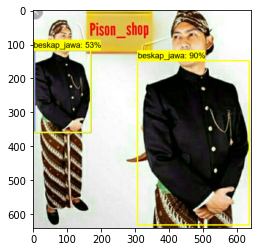

In [64]:
detection_classes, detection_scores = detect_image(IMAGE_PATH, category_index)

In [65]:
detection_classes

array([ 2, 24,  2, 14, 24, 11,  3, 24, 20,  1, 27, 17,  7, 29, 20,  1, 26,
       25, 17,  1,  6, 29,  5, 20, 23, 25, 23, 25, 17,  6,  5, 19,  2, 17,
       10, 27,  2, 27,  3,  1, 20,  2, 23,  1,  6,  7, 27, 10, 23, 10, 19,
        1, 27,  4,  2, 23, 27, 17, 27,  5,  1, 26,  1, 12, 19, 19, 27,  2,
       19, 20,  6, 27, 23, 27, 20,  6, 15, 24, 13, 23, 23, 14, 29,  1, 17,
       12, 27, 10, 27, 27, 23, 27, 23, 24, 23, 19, 27, 15, 23, 13],
      dtype=int64)

In [66]:
detection_scores

array([0.8957174 , 0.7525012 , 0.533624  , 0.29405048, 0.22699644,
       0.17837901, 0.14095655, 0.13292307, 0.12751916, 0.11825635,
       0.09394761, 0.08727167, 0.08110815, 0.07539818, 0.0747766 ,
       0.07387413, 0.07167111, 0.06752265, 0.06163433, 0.06162329,
       0.06117298, 0.06057956, 0.05347937, 0.05081138, 0.05059447,
       0.04743702, 0.04740801, 0.0468689 , 0.04672417, 0.04437395,
       0.04141337, 0.04102026, 0.04062908, 0.04020695, 0.03996831,
       0.03963982, 0.03766669, 0.03707875, 0.03698086, 0.03669384,
       0.03635506, 0.03548568, 0.03533034, 0.03519037, 0.03489836,
       0.03460936, 0.03417119, 0.03370736, 0.03359016, 0.03348503,
       0.03240928, 0.0315816 , 0.03137601, 0.03112236, 0.03047956,
       0.03007526, 0.02990063, 0.02932823, 0.02886919, 0.02809777,
       0.02808522, 0.02808221, 0.02798473, 0.02785944, 0.02755534,
       0.02666364, 0.02598004, 0.0255409 , 0.0255142 , 0.02536768,
       0.02511048, 0.02485462, 0.02443885, 0.02413897, 0.02337

# Export Model

In [67]:
from export_model import freeze_graph, export_to_tfjs, export_to_tflite

In [68]:
FREEZE_SCRIPT = os.path.join(paths['APIMODEL_PATH'], 'research', 'object_detection', 'exporter_main_v2.py ')
PIPELINE_CONFIG = files['PIPELINE_CONFIG']
CHECKPOINT_PATH = paths['CHECKPOINT_PATH']
OUTPUT_PATH = paths['OUTPUT_PATH']

In [69]:
freeze_graph(FREEZE_SCRIPT, PIPELINE_CONFIG, CHECKPOINT_PATH, OUTPUT_PATH)

2022-06-12 09:58:48.455961: I tensorflow/core/platform/cpu_feature_guard.cc:142] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX AVX2
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.
2022-06-12 09:58:48.982673: I tensorflow/core/common_runtime/gpu/gpu_device.cc:1510] Created device /job:localhost/replica:0/task:0/device:GPU:0 with 2149 MB memory:  -> device: 0, name: NVIDIA GeForce GTX 1650, pci bus id: 0000:01:00.0, compute capability: 7.5
Instructions for updating:
back_prop=False is deprecated. Consider using tf.stop_gradient instead.
Instead of:
results = tf.map_fn(fn, elems, back_prop=False)
Use:
results = tf.nest.map_structure(tf.stop_gradient, tf.map_fn(fn, elems))
W0612 09:58:49.628567 29444 deprecation.py:611] From C:\Users\Fadhlan\AppData\Roaming\Python\Python38\site-packages\tensorflow\python\autograph\impl\api.py:463:

In [70]:
TFJS_PATH = paths['TFJS_PATH']
OUTPUT_PATH_SAVED_MODEL = os.path.join(OUTPUT_PATH, 'saved_model')

In [71]:
export_to_tfjs(OUTPUT_PATH_SAVED_MODEL, TFJS_PATH)

Writing weight file Tensorflow\workspace\models\30C_3_custom_ssd_mobilenet_v2_fpnlite_320x320\tfjsexport\model.json...


2022-06-12 10:00:04.758301: I tensorflow/core/platform/cpu_feature_guard.cc:142] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX AVX2
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.
2022-06-12 10:00:05.827722: I tensorflow/core/common_runtime/gpu/gpu_device.cc:1510] Created device /job:localhost/replica:0/task:0/device:GPU:0 with 2149 MB memory:  -> device: 0, name: NVIDIA GeForce GTX 1650, pci bus id: 0000:01:00.0, compute capability: 7.5
2022-06-12 10:00:17.991276: I tensorflow/core/grappler/devices.cc:66] Number of eligible GPUs (core count >= 8, compute capability >= 0.0): 1
2022-06-12 10:00:17.992748: I tensorflow/core/grappler/clusters/single_machine.cc:357] Starting new session
2022-06-12 10:00:18.035948: I tensorflow/core/common_runtime/gpu/gpu_device.cc:1510] Created device /job:localhost/replica:0/task:0/device:GPU:0 w

In [72]:
TFLITE_SCRIPT = os.path.join(paths['APIMODEL_PATH'], 'research', 'object_detection', 'export_tflite_graph_tf2.py ')
TFLITE_PATH = paths['TFLITE_PATH']
# Change FILENAME_MODEL that you want
FILENAME_MODEL = '30C_3_custom_ssd_mobilenet_v2_fpnlite_320x320.tflite'
FROZEN_TFLITE_PATH = os.path.join(TFLITE_PATH, 'saved_model')
TFLITE_MODEL= os.path.join(TFLITE_PATH, 'saved_model', FILENAME_MODEL)

In [73]:
#NB: Centernet can't export to tflite
export_to_tflite(TFLITE_SCRIPT, PIPELINE_CONFIG, CHECKPOINT_PATH, TFLITE_PATH, FROZEN_TFLITE_PATH, TFLITE_MODEL)

2022-06-12 10:00:44.169182: I tensorflow/core/platform/cpu_feature_guard.cc:142] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX AVX2
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.
2022-06-12 10:00:45.159313: I tensorflow/core/common_runtime/gpu/gpu_device.cc:1510] Created device /job:localhost/replica:0/task:0/device:GPU:0 with 2149 MB memory:  -> device: 0, name: NVIDIA GeForce GTX 1650, pci bus id: 0000:01:00.0, compute capability: 7.5
2022-06-12 10:00:52.212814: I tensorflow/core/common_runtime/gpu/gpu_device.cc:1510] Created device /job:localhost/replica:0/task:0/device:GPU:0 with 2149 MB memory:  -> device: 0, name: NVIDIA GeForce GTX 1650, pci bus id: 0000:01:00.0, compute capability: 7.5
2022-06-12 10:00:53.955811: I tensorflow/core/common_runtime/gpu/gpu_device.cc:1510] Created device /job:localhost/replica:0/task:0/de

2022-06-12 10:01:38.357098: I tensorflow/core/platform/cpu_feature_guard.cc:142] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX AVX2
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.
2022-06-12 10:01:39.395345: I tensorflow/core/common_runtime/gpu/gpu_device.cc:1510] Created device /job:localhost/replica:0/task:0/device:GPU:0 with 2149 MB memory:  -> device: 0, name: NVIDIA GeForce GTX 1650, pci bus id: 0000:01:00.0, compute capability: 7.5
2022-06-12 10:01:51.560985: W tensorflow/compiler/mlir/lite/python/tf_tfl_flatbuffer_helpers.cc:351] Ignored output_format.
2022-06-12 10:01:51.561074: W tensorflow/compiler/mlir/lite/python/tf_tfl_flatbuffer_helpers.cc:354] Ignored drop_control_dependency.
2022-06-12 10:01:51.561083: W tensorflow/compiler/mlir/lite/python/tf_tfl_flatbuffer_helpers.cc:360] Ignored change_concat_input_ranges.
2